In [2]:
# Import necessary libraries
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.compose import *
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import *
from sklearn.model_selection import *
from sklearn.discriminant_analysis import *
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.naive_bayes import *
from sklearn.pipeline import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.linear_model import *
import os

warnings.simplefilter('ignore')

os.chdir('D:/Datasets')

hr = pd.read_csv('HR_comma_sep.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,support,low
14991,0.37,0.48,2,160,3,0,1,0,support,low
14992,0.37,0.53,2,143,3,0,1,0,support,low
14993,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
dum_hr = pd.get_dummies(hr, drop_first=True)

x = dum_hr.drop(['left'], axis=1)
y = dum_hr['left']
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


# split

In [4]:
# Split the dataset into training and testing sets
# x and y are the feature and target variables, respectively
# test_size=0.3 means 30% of the data will be used for testing
# stratify=y ensures the class distribution in the training and testing sets is the same as the original dataset
# random_state=24 sets the random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=24)

# Create a Decision Tree Classifier model
# random_state=24 sets the random seed for reproducibility
# max_depth=3 limits the maximum depth of the decision tree to 3 levels
# min_samples_leaf=20 sets the minimum number of samples required to be at a leaf node to 20
dtc = DecisionTreeClassifier(random_state=24, max_depth=3, min_samples_leaf=20)

# Train the Decision Tree Classifier model on the training data
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=24)

# Tree Plot

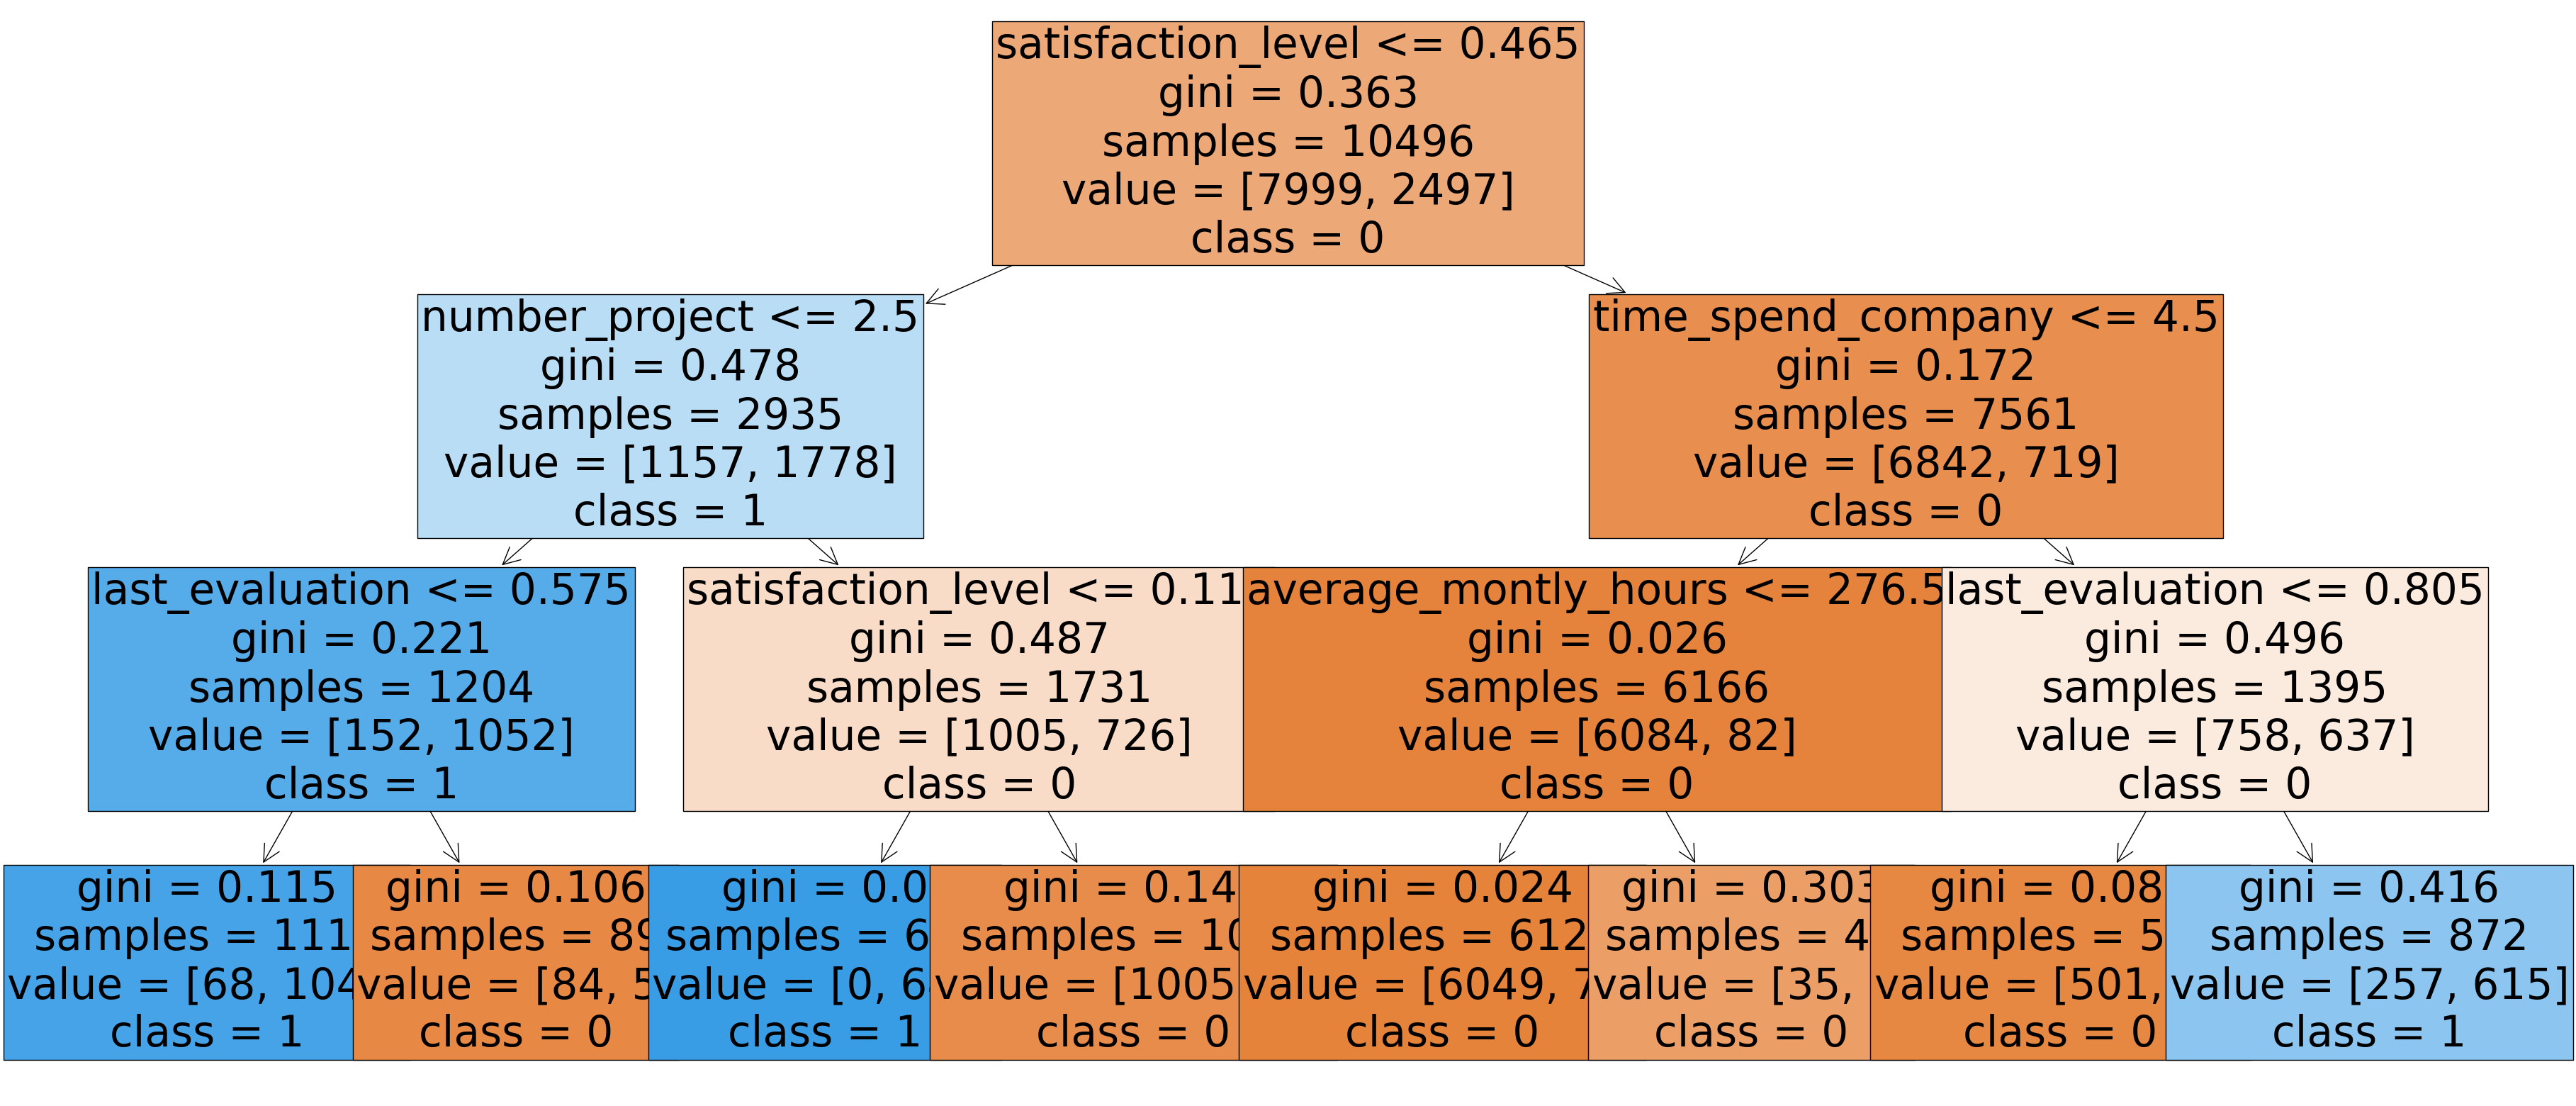

In [6]:
# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(45, 20))

# Plot the decision tree
# dtc is the trained Decision Tree Classifier model
# feature_names=x_train.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree
# filled=True fills the tree nodes with colors
# fontsize=43 sets the font size for the tree
plot_tree(dtc, feature_names=x_train.columns, class_names=['0', '1'], filled=True, fontsize=43)

# Display the plot
plt.show()

# Gini calculation 

In [7]:
# Calculate the first fraction
f1 = 7999 / 10496

# Calculate the second fraction
f2 = 2497 / 10496

# Print the values of the two fractions
print(f1)
print(f2)

0.7620998475609756
0.2379001524390244


In [8]:
# Calculate the Gini impurity
gini = f1 * (1 - f1) + f2 * (1 - f2)

# Print the Gini impurity
print(gini)

0.3626073398170267


In [11]:
# Make predictions on the test data using the trained Decision Tree Classifier model
y_Pred = dtc.predict(x_test)

# Calculate the accuracy score of the predictions
accuracy = accuracy_score(y_test, y_Pred)

# Print the accuracy score
print(accuracy)

0.9551011335852412


# Using gridsearchCV

In [12]:
# Define the hyperparameter grid for the Decision Tree Classifier
params = {
    'max_depth': [2, 5, 7, 10, 13, None],
    'min_samples_split': [2, 5, 7, 10, 13],
    'min_samples_leaf': [1, 5, 7, 0, 10, 13]
}

# Create a 5-fold cross-validation object with shuffling and a random state of 24
kfold = KFold(n_splits=5, shuffle=True, random_state=24)

# Create a Decision Tree Classifier model with a random state of 24
dtc = DecisionTreeClassifier(random_state=24)

# Create a GridSearchCV object to perform hyperparameter tuning
# dtc is the base estimator
# param_grid=params is the hyperparameter grid to search
# cv=kfold is the cross-validation object
# scoring='neg_log_loss' is the evaluation metric to use (negative log-loss)
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')

# Fit the GridSearchCV object to the data
gcv.fit(x, y)

# Print the best hyperparameters found by the grid search
print(gcv.best_params_)

# Print the best score (negative log-loss) achieved by the grid search
print(gcv.best_score_)

{'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}
-0.09939491449914158


# Best tree

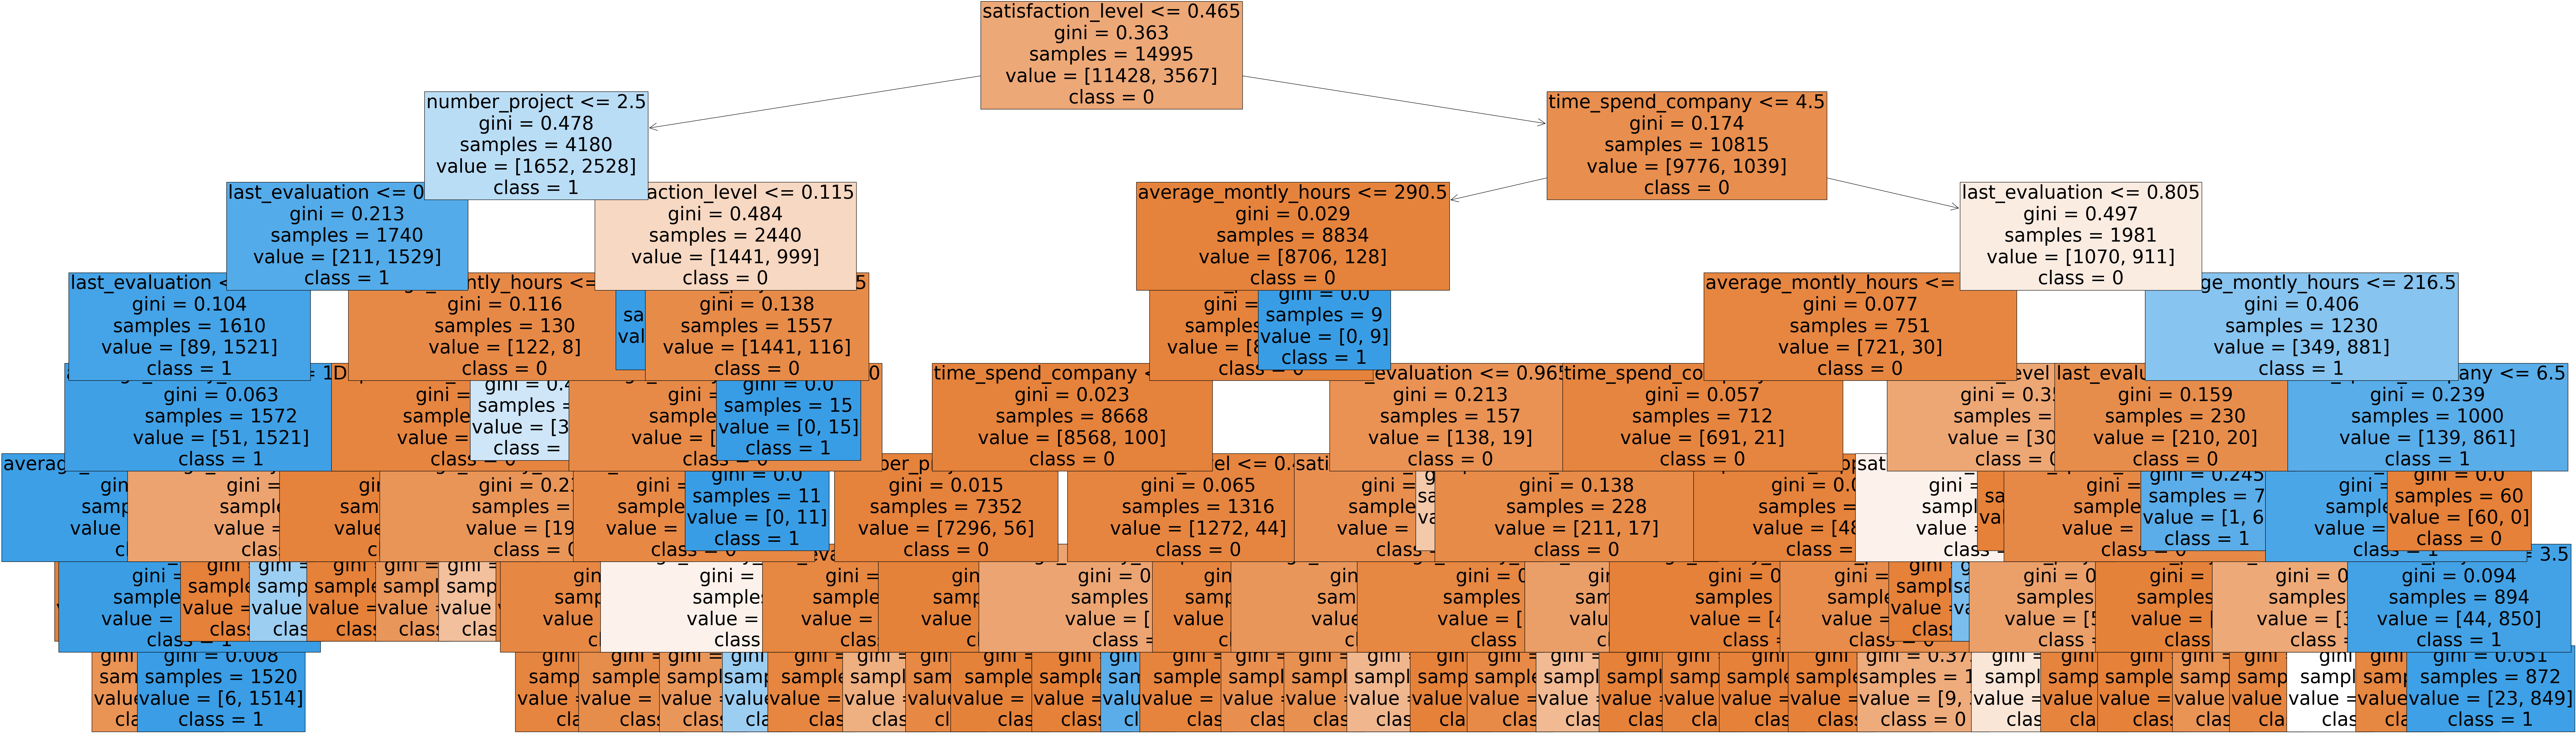

In [13]:
# Get the best estimator (Decision Tree Classifier) from the GridSearchCV object
best_tree = gcv.best_estimator_

# Create a figure with a larger size to accommodate the tree
plt.figure(figsize=(100, 30))

# Plot the best decision tree
# best_tree is the best estimator found by the GridSearchCV
# feature_names=x_train.columns provides the feature names for the tree
# class_names=['0', '1'] sets the class names for the tree
# filled=True fills the tree nodes with colors
# fontsize=43 sets the font size for the tree
plot_tree(best_tree, feature_names=x_train.columns, class_names=['0', '1'], filled=True, fontsize=43)

# Display the plot
plt.show()

# feature importance

In [95]:
# Get the feature importances of the best decision tree
imp = best_tree.feature_importances_

# Print the feature importances
print(imp)

array([5.27459389e-01, 1.43961657e-01, 1.06020358e-01, 7.09939439e-02,
       1.50874812e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.57370325e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.62907134e-05, 4.46178918e-04,
       0.00000000e+00, 0.00000000e+00])

# feature importance plot

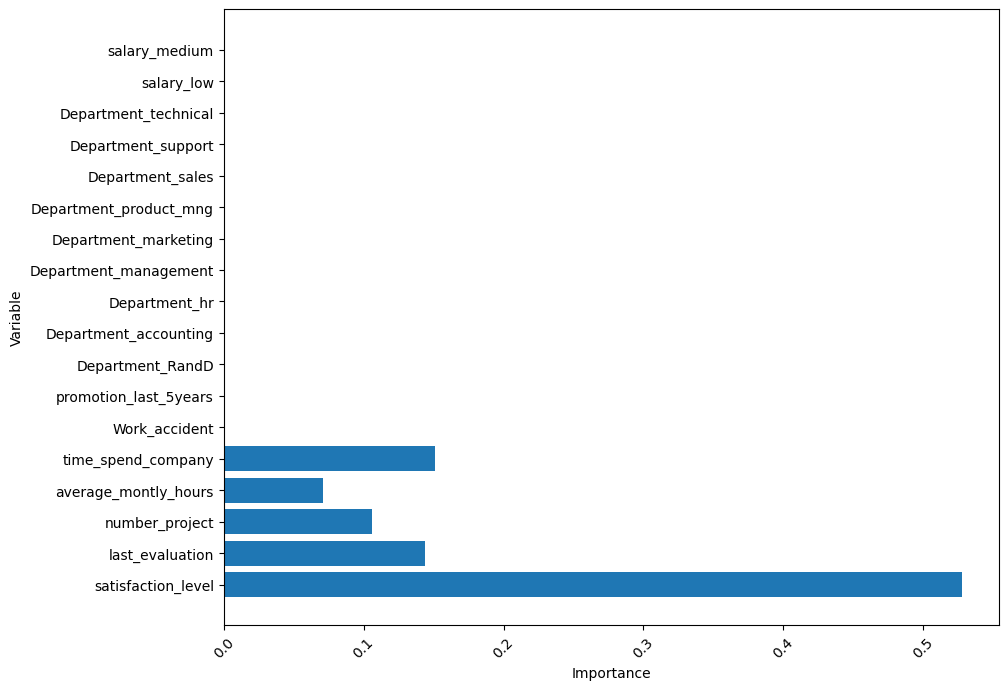

In [14]:
# Create a pandas DataFrame with the feature names and importances
pd_imp = pd.DataFrame({'var': list(x.columns), 'imp': best_tree.feature_importances_})

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(10, 8))
plt.barh(pd_imp['var'], pd_imp['imp'])

# Set the x-axis label
plt.xlabel('Importance')

# Rotate the x-axis tick labels by 45 degrees
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Variable')

# Display the plot
plt.show()